Need to clean the notebook before the meeting

CSSG info session preparation

In [4]:
import numpy as np
import om10
import astropy.io.fits
import astropy
from astropy.io import fits

1.txt contains Lens Name . . . u g r i z . . .

2.txt contains LensName Redshift . . . . . . .

3.txt contains Name	Obs. Date	Instrument	Slit	Width	Seeing	Exp. Time	z_d	z_s	sigma	S/N	Resolution

I need to merge all the textfiles. III_a and III_b is III table 4 and 5
IV is table 3

In [5]:
III_a = np.genfromtxt('../data/1.txt', dtype=str, usecols = (0, 4, 5, 6, 7, 8), invalid_raise=False, missing_values='xxx', usemask=False)
III_b = np.genfromtxt('../data/2.txt', dtype=str, usecols = (0, 1), invalid_raise=False, missing_values='xxx')
IV = np.genfromtxt('../data/3.txt', dtype=str, usecols = (0, 11), invalid_raise=False, missing_values='xxx')
name = np.array([])
redshift = np.array([])
veldisp = np.array([])
u = np.array([])
g = np.array([])
r = np.array([])
i = np.array([])
z = np.array([])
# O(n)
for (lensName, aIndex) in zip(III_a[:,0], range(len(III_a))):
    if lensName in III_b[:,0]:
        # assuming one occurence
        bIndex = np.argwhere(III_b[:,0]==lensName)[0][0]
        if lensName in IV[:,0]:
            VIndex = np.argwhere(IV[:,0]==lensName)[0][0]
            # only redshift has the problem
            if(IV[VIndex][1].isdigit()):
                name = np.append(name, lensName)
                redshift = np.append(redshift, float(III_b[bIndex][1]))
                veldisp = np.append(veldisp, float(IV[VIndex][1]))
                u = np.append(u, float(III_a[aIndex][1]))
                g = np.append(g, float(III_a[aIndex][2]))
                r = np.append(r, float(III_a[aIndex][3]))
                i = np.append(i, float(III_a[aIndex][4]))
                z = np.append(z, float(III_a[aIndex][5]))
from astropy.table import Table
table = Table([name, redshift, veldisp, u, g, r, i, z], names=['ID', 'ZLENS', 'VELDISP', 'MAGU', 'MAGG', 'MAGR', 'MAGI', 'MAGZ'])
np.savetxt('merged.txt', (name,redshift,veldisp,u,g,r,i,z), header="% name redshift veldisp u g r i z", fmt='%s') 

column : name redshift veldisp u g r i z

In [6]:
#from astropy.table import Table
#table = Table.read('merged.txt', format='ascii')
#meta={'name': 'first table'}
db = om10.DB(catalog='/Users/Jenny/Desktop/om10fork/om10/data/qso_mock.fits')
db.sample = table
db.lenses = table
# okay so speed did not change at ALL T_T
db.paint(synthetic=True, target='lens')
print db.sample

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
1
7.346259
2
7.368164
3
11.403146
3
11.403617
3
11.403836
4
11.404049
4
11.404202
2
11.404262
3
15.252802
3
15.253916
3
15.254348
4
15.254607
4
15.254779
2
15.254848
3
18.961092
3
18.961638
3
18.961892
4
18.96213
4
18.9623
2
18.962373
3
22.865538
3
22.866089
3
22.866346
4
22.866589
4
22.866763
2
22.866836
3
26.571881
3
26.572426
3
26.572679
4
26.572923
4
26.573089
2
26.573158
3
30.369522
3
30.370071
3
30.370336
4
30.370566
4
30.370733
2
30.370799
3
34.250823
3
34.251339
3
34.251622
4
34.251876
4
34.252046
2
34.252123
3
38.115585
3
38.11602
3
38.116508
4
38.116745
4
38.116906
2
38.11697
3
41.862347
3
41.86291
3
41.863137
4
41.86336
4
41.863513
2
41.863575
3
45.492725
3
45.493261
3
45.493625
4
45.493882
4
45.494046
2
45.494112
3
49.120294
3
49.120898
3
49.121172
4
49.121431
4
49.121584
2
49.121645
3
53.194629
3
53.19499
3
53.195442
4
53.195973
4
53.196147
2
53.196218
3
56.845323
3
56.845914
3

In [7]:
fig1 = om10.plot_sample(db.sample, color='blue', parameters=('MAGI','ZLENS', 'GR', 'RI', 'IZ'))

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


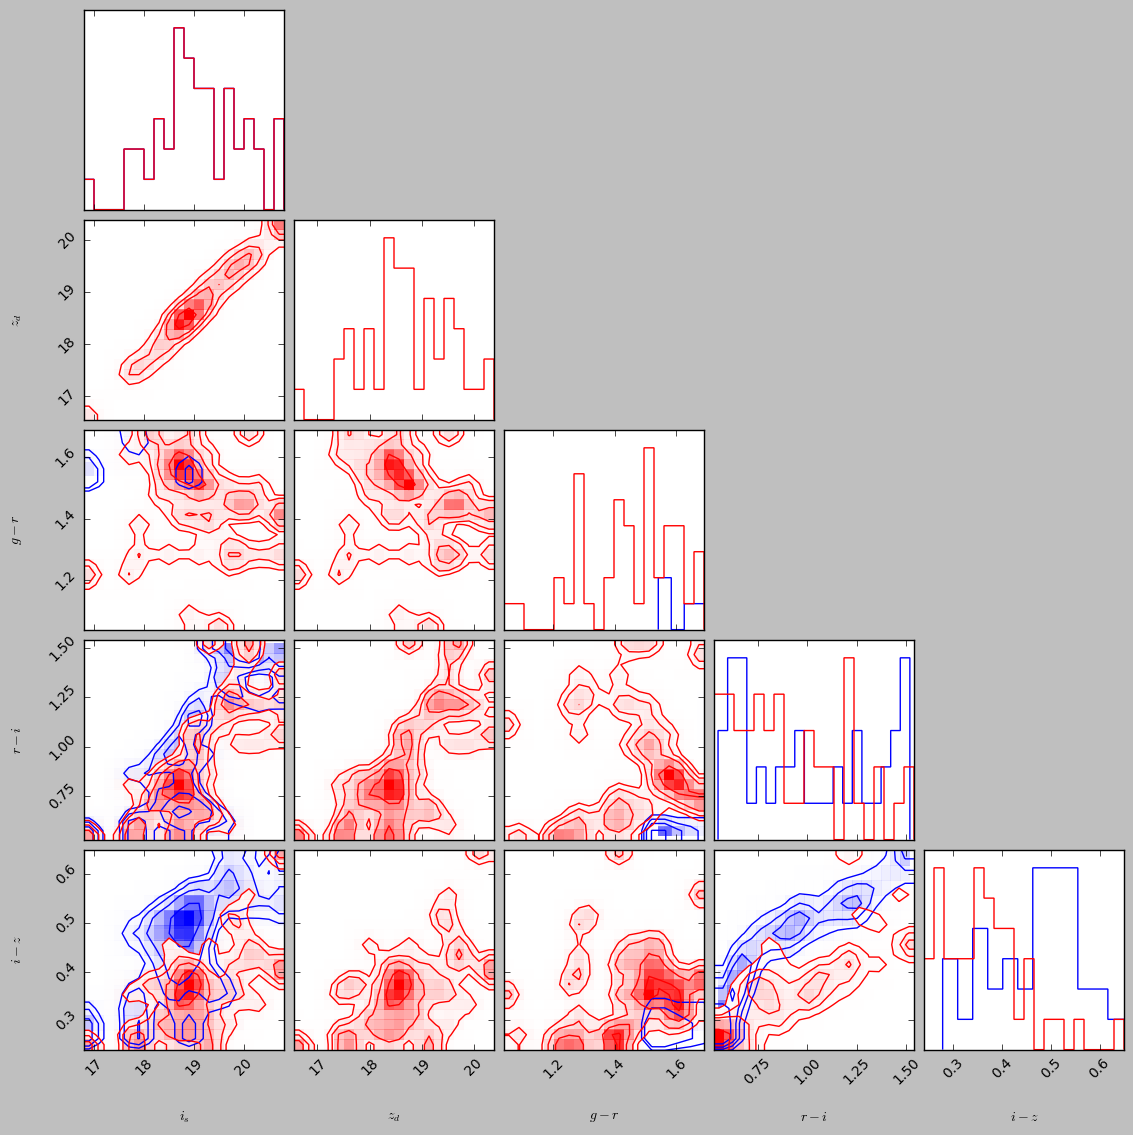

In [8]:
import matplotlib
%matplotlib inline
matplotlib.rc('text', usetex=False)
gr = g-r
ri = r-i
iz = i-z
data = Table({'MAGI': i, 'ZLENS': z, 'GR': gr, 'RI': ri, 'IZ': iz}, names=['MAGI', 'ZLENS', 'GR', 'RI', 'IZ'])
axis_labels = {}
axis_labels['ZLENS'] = '$redshift$'
axis_labels['MAGI'] = '$i$'
axis_labels['GR'] = '$g-r$'
axis_labels['RI'] = '$r-i$'
axis_labels['IZ'] = '$i-z$'
from om10 import plotting
import corner
features, labels = plotting.extract_features(data, ('MAGI','ZLENS', 'GR', 'RI', 'IZ'))
corner.corner(features, labels=labels, color='red', smooth=1.0, fig=fig1)